# CAR PRICE PREDICTION

In [63]:

#Fetching dataset

In [64]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [65]:
cardf=pd.read_csv("E:/ds2/cardata.csv")

In [66]:
df=cardf.copy()

In [67]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [69]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [70]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [71]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [72]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

#Selling_Price column is going to be the target column 

In [76]:
y=df[["Selling_Price"]]
x=df.drop(labels=["Selling_Price","Car_Name"],axis=1)

In [77]:
cat = []
con = []
for i in x.columns:
    if(x[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [78]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xcon = pd.DataFrame(ss.fit_transform(x[con]),columns=con)

In [79]:
xcat = pd.get_dummies(x[cat])
x= xcon.join(xcat)


spliting data into training and testing 

In [80]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.1,random_state=2)

In [33]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
model=lr.fit(xtrain,ytrain)
pred=lr.predict(xtrain)

In [40]:
from sklearn import metrics
error_score = metrics.r2_score(ytrain, pred)


In [41]:
error_score

0.8826805250490879

In [42]:
import seaborn as sb
import matplotlib.pyplot as plt

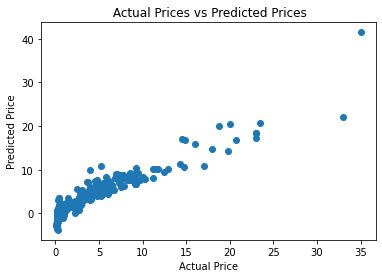

In [43]:
plt.scatter(ytrain,pred )
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [46]:
# prediction on Training data
tsd = lr.predict(xtest)

In [48]:
error_score = metrics.r2_score(ytest, tsd)
error_score

0.8693753727249833

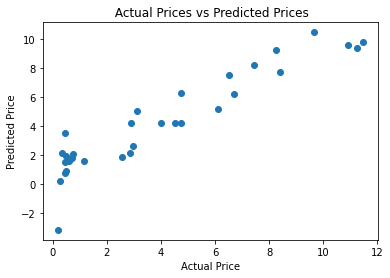

In [49]:
plt.scatter(ytest, tsd)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [54]:
# loading the linear regression model
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(xtrain,ytrain)

Lasso()

In [55]:
trd = ls.predict(xtrain)

In [57]:
# R squared Error
error_score = metrics.r2_score(ytrain, trd)
error_score

0.7760338058092467

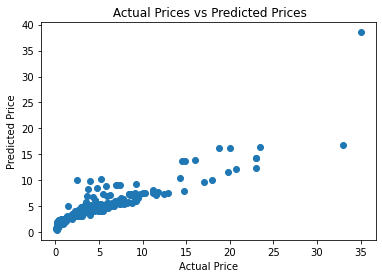

In [58]:
plt.scatter(ytrain, trd)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [61]:
# prediction on test data
tsd = ls.predict(xtest)
# R squared Error
error_score = metrics.r2_score(ytest, tsd)
error_score

0.8001665137798091

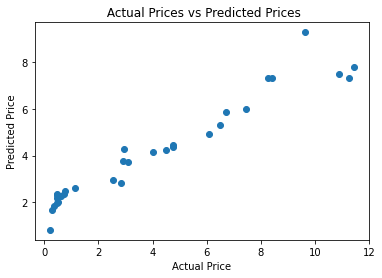

In [62]:
plt.scatter(ytest, tsd)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()